In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
import os
import threading
import re

# Gathering Data
## 1.Twitter Archive file

In [3]:
df_ta=pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
df_ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null float64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(5), int64(2), 

In [5]:
df_ta.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.924210e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,8.921770e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,8.918150e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,8.916900e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,8.913280e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
df_ta.sort_values('timestamp')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,6.660210e+17,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
2354,6.660290e+17,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2353,6.660330e+17,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2352,6.660440e+17,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2351,6.660490e+17,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2350,6.660510e+17,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2349,6.660520e+17,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2348,6.660560e+17,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2347,6.660570e+17,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2346,6.660590e+17,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None


## 2. Image Prediction file 

In [7]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response=requests.get(url)

In [8]:
with open ('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

In [9]:
image_prediction=pd.read_csv('image-predictions.tsv',sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 3. Twitter API & JSON

In [10]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [10]:
tweet_ids = df_ta['tweet_id'].values
len(tweet_ids)

2356

In [12]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
#start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
#end = timer()
#print(end - start)
print(fails_dict)

1: 8.92421e+17
Fail
2: 8.92177e+17
Fail
3: 8.91815e+17
Fail
4: 8.9169e+17
Fail
5: 8.91328e+17
Fail
6: 8.91088e+17
Fail
7: 8.90972e+17
Fail
8: 8.90729e+17
Fail
9: 8.90609e+17
Fail
10: 8.9024e+17
Fail
11: 8.90007e+17
Fail
12: 8.89881e+17
Fail
13: 8.89665e+17
Fail
14: 8.89639e+17
Fail
15: 8.89531e+17
Fail
16: 8.89279e+17
Fail
17: 8.88917e+17
Fail
18: 8.88805e+17
Fail
19: 8.88555e+17
Fail
20: 8.88203e+17
Fail
21: 8.88078e+17
Fail
22: 8.87705e+17
Fail
23: 8.87517e+17
Fail
24: 8.87474e+17
Fail
25: 8.87343e+17
Fail
26: 8.87101e+17
Fail
27: 8.86983e+17
Fail
28: 8.86737e+17
Fail
29: 8.8668e+17
Fail
30: 8.86366e+17
Fail
31: 8.86267e+17
Fail
32: 8.86258e+17
Fail
33: 8.86054e+17
Fail
34: 8.85985e+17
Fail
35: 8.85529e+17
Fail
36: 8.85519e+17
Fail
37: 8.85312e+17
Fail
38: 8.85168e+17
Fail
39: 8.84926e+17
Fail
40: 8.84877e+17
Fail
41: 8.84563e+17
Fail
42: 8.84442e+17
Fail
43: 8.84248e+17
Fail
44: 8.84163e+17
Fail
45: 8.83838e+17
Fail
46: 8.83483e+17
Fail
47: 8.83361e+17
Fail
48: 8.83118e+17
Fail
49: 

Fail
381: 8.27601e+17
Fail
382: 8.27325e+17
Fail
383: 8.27228e+17
Fail
384: 8.272e+17
Fail
385: 8.26959e+17
Fail
386: 8.26849e+17
Fail
387: 8.26615e+17
Fail
388: 8.26599e+17
Fail
389: 8.26598e+17
Fail
390: 8.26477e+17
Fail
391: 8.2624e+17
Fail
392: 8.26205e+17
Fail
393: 8.26115e+17
Fail
394: 8.25877e+17
Fail
395: 8.2583e+17
Fail
396: 8.25535e+17
Fail
397: 8.25148e+17
Fail
398: 8.2512e+17
Fail
399: 8.25027e+17
Fail
400: 8.24796e+17
Fail
401: 8.24775e+17
Fail
402: 8.24664e+17
Fail
403: 8.24326e+17
Fail
404: 8.24297e+17
Fail
405: 8.24025e+17
Fail
406: 8.2394e+17
Fail
407: 8.23719e+17
Fail
408: 8.23699e+17
Fail
409: 8.23581e+17
Fail
410: 8.23333e+17
Fail
411: 8.23323e+17
Fail
412: 8.2327e+17
Fail
413: 8.22975e+17
Fail
414: 8.22873e+17
Fail
415: 8.22859e+17
Fail
416: 8.22647e+17
Fail
417: 8.2261e+17
Fail
418: 8.22489e+17
Fail
419: 8.22463e+17
Fail
420: 8.22245e+17
Fail
421: 8.22163e+17
Fail
422: 8.21886e+17
Fail
423: 8.21814e+17
Fail
424: 8.21766e+17
Fail
425: 8.21523e+17
Fail
426: 8.21421e

Fail
755: 7.78765e+17
Fail
756: 7.78749e+17
Fail
757: 7.78651e+17
Fail
758: 7.78625e+17
Fail
759: 7.78408e+17
Fail
760: 7.78397e+17
Fail
761: 7.78383e+17
Fail
762: 7.78287e+17
Fail
763: 7.78039e+17
Fail
764: 7.78027e+17
Fail
765: 7.77953e+17
Fail
766: 7.77885e+17
Fail
767: 7.77684e+17
Fail
768: 7.77642e+17
Fail
769: 7.77622e+17
Fail
770: 7.7719e+17
Fail
771: 7.76819e+17
Fail
772: 7.76813e+17
Fail
773: 7.76478e+17
Fail
774: 7.7625e+17
Fail
775: 7.76218e+17
Fail
776: 7.76202e+17
Fail
777: 7.76113e+17
Fail
778: 7.76088e+17
Fail
779: 7.75899e+17
Fail
780: 7.75843e+17
Fail
781: 7.75733e+17
Fail
782: 7.75729e+17
Fail
783: 7.75365e+17
Fail
784: 7.75351e+17
Fail
785: 7.75097e+17
Fail
786: 7.75085e+17
Fail
787: 7.74758e+17
Fail
788: 7.74639e+17
Fail
789: 7.74314e+17
Fail
790: 7.73986e+17
Fail
791: 7.73922e+17
Fail
792: 7.73705e+17
Fail
793: 7.7367e+17
Fail
794: 7.73548e+17
Fail
795: 7.73337e+17
Fail
796: 7.73309e+17
Fail
797: 7.73248e+17
Fail
798: 7.73192e+17
Fail
799: 7.72877e+17
Fail
800: 7.7

Fail
1124: 7.30427e+17
Fail
1125: 7.30212e+17
Fail
1126: 7.30197e+17
Fail
1127: 7.29855e+17
Fail
1128: 7.29839e+17
Fail
1129: 7.29824e+17
Fail
1130: 7.29464e+17
Fail
1131: 7.29114e+17
Fail
1132: 7.28986e+17
Fail
1133: 7.28761e+17
Fail
1134: 7.28751e+17
Fail
1135: 7.28654e+17
Fail
1136: 7.2841e+17
Fail
1137: 7.28387e+17
Fail
1138: 7.28047e+17
Fail
1139: 7.28035e+17
Fail
1140: 7.28016e+17
Fail
1141: 7.27686e+17
Fail
1142: 7.27645e+17
Fail
1143: 7.27525e+17
Fail
1144: 7.27314e+17
Fail
1145: 7.27286e+17
Fail
1146: 7.27175e+17
Fail
1147: 7.27156e+17
Fail
1148: 7.26935e+17
Fail
1149: 7.26887e+17
Fail
1150: 7.26828e+17
Fail
1151: 7.26225e+17
Fail
1152: 7.25842e+17
Fail
1153: 7.25787e+17
Fail
1154: 7.25729e+17
Fail
1155: 7.25459e+17
Fail
1156: 7.24984e+17
Fail
1157: 7.24772e+17
Fail
1158: 7.24406e+17
Fail
1159: 7.2405e+17
Fail
1160: 7.24046e+17
Fail
1161: 7.24005e+17
Fail
1162: 7.23913e+17
Fail
1163: 7.23688e+17
Fail
1164: 7.23673e+17
Fail
1165: 7.2318e+17
Fail
1166: 7.22975e+17
Fail
1167: 7.2

Fail
1483: 6.93267e+17
Fail
1484: 6.93263e+17
Fail
1485: 6.93232e+17
Fail
1486: 6.93156e+17
Fail
1487: 6.93109e+17
Fail
1488: 6.93095e+17
Fail
1489: 6.92919e+17
Fail
1490: 6.92906e+17
Fail
1491: 6.92902e+17
Fail
1492: 6.92894e+17
Fail
1493: 6.92828e+17
Fail
1494: 6.92752e+17
Fail
1495: 6.92569e+17
Fail
1496: 6.92535e+17
Fail
1497: 6.92531e+17
Fail
1498: 6.92423e+17
Fail
1499: 6.92417e+17
Fail
1500: 6.92187e+17
Fail
1501: 6.92158e+17
Fail
1502: 6.92143e+17
Fail
1503: 6.92042e+17
Fail
1504: 6.92017e+17
Fail
1505: 6.9182e+17
Fail
1506: 6.91793e+17
Fail
1507: 6.91757e+17
Fail
1508: 6.91676e+17
Fail
1509: 6.91483e+17
Fail
1510: 6.9146e+17
Fail
1511: 6.91445e+17
Fail
1512: 6.91417e+17
Fail
1513: 6.91322e+17
Fail
1514: 6.91097e+17
Fail
1515: 6.9109e+17
Fail
1516: 6.90989e+17
Fail
1517: 6.9096e+17
Fail
1518: 6.90939e+17
Fail
1519: 6.90933e+17
Fail
1520: 6.90736e+17
Fail
1521: 6.90729e+17
Fail
1522: 6.90691e+17
Fail
1523: 6.9065e+17
Fail
1524: 6.90607e+17
Fail
1525: 6.90597e+17
Fail
1526: 6.904

Fail
1842: 6.75878e+17
Fail
1843: 6.75871e+17
Fail
1844: 6.75853e+17
Fail
1845: 6.75849e+17
Fail
1846: 6.75846e+17
Fail
1847: 6.75823e+17
Fail
1848: 6.75821e+17
Fail
1849: 6.75798e+17
Fail
1850: 6.75782e+17
Fail
1851: 6.7574e+17
Fail
1852: 6.75711e+17
Fail
1853: 6.75707e+17
Fail
1854: 6.75707e+17
Fail
1855: 6.75534e+17
Fail
1856: 6.75531e+17
Fail
1857: 6.75522e+17
Fail
1858: 6.75518e+17
Fail
1859: 6.75501e+17
Fail
1860: 6.75497e+17
Fail
1861: 6.7549e+17
Fail
1862: 6.75483e+17
Fail
1863: 6.75433e+17
Fail
1864: 6.75372e+17
Fail
1865: 6.75363e+17
Fail
1866: 6.75354e+17
Fail
1867: 6.75349e+17
Fail
1868: 6.75334e+17
Fail
1869: 6.75167e+17
Fail
1870: 6.75153e+17
Fail
1871: 6.75149e+17
Fail
1872: 6.75147e+17
Fail
1873: 6.75147e+17
Fail
1874: 6.75145e+17
Fail
1875: 6.75135e+17
Fail
1876: 6.75114e+17
Fail
1877: 6.75112e+17
Fail
1878: 6.75109e+17
Fail
1879: 6.75047e+17
Fail
1880: 6.75015e+17
Fail
1881: 6.75006e+17
Fail
1882: 6.75003e+17
Fail
1883: 6.75e+17
Fail
1884: 6.74805e+17
Fail
1885: 6.748

Fail
2200: 6.68779e+17
Fail
2201: 6.68655e+17
Fail
2202: 6.68646e+17
Fail
2203: 6.68644e+17
Fail
2204: 6.68641e+17
Fail
2205: 6.68637e+17
Fail
2206: 6.68633e+17
Fail
2207: 6.68631e+17
Fail
2208: 6.68627e+17
Fail
2209: 6.68626e+17
Fail
2210: 6.68623e+17
Fail
2211: 6.6862e+17
Fail
2212: 6.68615e+17
Fail
2213: 6.68587e+17
Fail
2214: 6.68568e+17
Fail
2215: 6.68545e+17
Fail
2216: 6.68542e+17
Fail
2217: 6.68538e+17
Fail
2218: 6.68529e+17
Fail
2219: 6.68508e+17
Fail
2220: 6.68497e+17
Fail
2221: 6.68484e+17
Fail
2222: 6.6848e+17
Fail
2223: 6.68467e+17
Fail
2224: 6.68297e+17
Fail
2225: 6.68292e+17
Fail
2226: 6.68286e+17
Fail
2227: 6.68274e+17
Fail
2228: 6.68269e+17
Fail
2229: 6.68256e+17
Fail
2230: 6.68248e+17
Fail
2231: 6.68238e+17
Fail
2232: 6.68226e+17
Fail
2233: 6.68221e+17
Fail
2234: 6.68205e+17
Fail
2235: 6.68191e+17
Fail
2236: 6.68172e+17
Fail
2237: 6.68155e+17
Fail
2238: 6.68142e+17
Fail
2239: 6.68113e+17
Fail
2240: 6.67937e+17
Fail
2241: 6.67925e+17
Fail
2242: 6.67915e+17
Fail
2243: 6.

In [11]:
df_list=[]
with open ('tweet-json.txt','r') as file:
    for line in file:
        tweet=json.loads(line)
        df_list.append(tweet)

In [12]:
df_json=pd.DataFrame(df_list)

In [13]:
df_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [14]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [15]:
#df_json_edited is a dataframe that contains (ID ,retweet count, source, favorite count, tweet text)
df_json_edited=df_json[['id_str','retweet_count','favorite_count','full_text','source']]

In [16]:
df_json_edited.head()

,id_str,retweet_count,favorite_count,full_text,source
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,8964,42908,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,9774,41048,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r..."


# Assesing Data

## 1. Visual assessment

In [17]:
df_ta

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.924210e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,8.921770e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,8.918150e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,8.916900e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,8.913280e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,8.910880e+17,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,8.909720e+17,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,8.907290e+17,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,8.906090e+17,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,8.902400e+17,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [18]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
df_json_edited

,id_str,retweet_count,favorite_count,full_text,source
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,8964,42908,This is Darla. She commenced a snooze mid meal...,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,9774,41048,This is Franklin. He would like you to stop ca...,"<a href=""http://twitter.com/download/iphone"" r..."
5,891087950875897856,3261,20562,Here we have a majestic great white breaching ...,"<a href=""http://twitter.com/download/iphone"" r..."
6,890971913173991426,2158,12041,Meet Jax. He enjoys ice cream so much he gets ...,"<a href=""http://twitter.com/download/iphone"" r..."
7,890729181411237888,16716,56848,When you watch your owner call another dog a g...,"<a href=""http://twitter.com/download/iphone"" r..."
8,890609185150312448,4429,28226,This is Zoey. She doesn't want to be one of th...,"<a href=""http://twitter.com/download/iphone"" r..."
9,890240255349198849,7711,32467,This is Cassie. She is a college pup. Studying...,"<a href=""http://twitter.com/download/iphone"" r..."


## 2. Programmatic assesment

In [20]:
df_ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null float64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(5), int64(2), 

In [21]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
df_json_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
id_str            2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
full_text         2354 non-null object
source            2354 non-null object
dtypes: int64(2), object(3)
memory usage: 92.0+ KB


In [23]:
#rating numerator counts
df_ta['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
df_ta['rating_denominator'][df_ta['rating_denominator']!=10].value_counts()

50     3
11     3
20     2
80     2
90     1
40     1
130    1
2      1
70     1
7      1
110    1
170    1
120    1
15     1
16     1
150    1
0      1
Name: rating_denominator, dtype: int64

In [25]:
df_ta['text'][df_ta['rating_denominator']!=10]

313     @jonnysun @Lin_Manuel ok jomny I know you're e...
342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
784     RT @dog_rates: After so many requests, this is...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someon

In [205]:
df_ta['text'][df_ta['rating_denominator']!=10].count()

23

In [26]:
print(df_ta['text'][342])  #11/15/15 #can't find the rate in text or image
print(df_ta['text'][433])  #84/70 >> 12/10
print(df_ta['text'][516])  #smilling 24/7 
print(df_ta['text'][784])  #9/11 >> 14/10 
print(df_ta['text'][902])  #165/150 >> 11/10
print(df_ta['text'][1068]) #duplicate of 784
print(df_ta['text'][1120]) #204/170 >> 12/10
print(df_ta['text'][1165]) #4/20 >> 13/10
print(df_ta['text'][1202]) #50/50 >> 11/10
print(df_ta['text'][1228]) #99/90 >> 11/10
print(df_ta['text'][1254]) #80/80 >> 10/10
print(df_ta['text'][1274]) #45/50 >> 9/10
print(df_ta['text'][1351]) #60/50 >> 12/10
print(df_ta['text'][1433]) #44/40 >> 11/10
print(df_ta['text'][1598]) #4/20 >> 2/10
print(df_ta['text'][1634]) #143/130 >> 11/10
print(df_ta['text'][1635]) #both 1634 and 1635 are the same image, 1634 is the correction of 1635
print(df_ta['text'][1662]) #7/11 >> 10/10
print(df_ta['text'][1663]) #20/16 #couldn't find image or rate in the text
print(df_ta['text'][1779]) #144/120 >> 12/10
print(df_ta['text'][1843]) #88/80 >> 11/10
print(df_ta['text'][2335]) #1/2 >> 9/10

@docmisterio account started on 11/15/15
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
Happy Saturday here's 9 p

# Cleaning Data

## **Quality**
##### **Twitter Archive**
1.  keep original ratings (no retweets) that have images
2.	Separate timestamp into three different columns
3.	Rating Numerator correction as it had some wrong values that I needed to change manually and programmatically. 
4.	Rating denominator correction that should  be 10 but there was some other extreme and wrong values
5.	Correcting the name column

##### **Image prediction file**
6.	Creating 1 column for image prediction and 1 column for confidence level
7.	Dropping duplicating images
8.	Drop unwanted columns

##### **Tweet JSON file**
9.	Keeping only the original tweets
10. Change (tweet_id) to int64 in order to merge with the other 2 tables

## **Tidiness**
##### **Twitter Archive**
1. Erroneous datatypes (doggo, floofer, pupper and puppo columns)  "Updated this method by udacity reviwer suggestion method"
2. Merging Twitter Archive and Image prediction to make columns part of one dataset

### Taking copy for each data

In [218]:
df_ta_clean = df_ta.copy()

In [342]:
image_prediction_clean = image_prediction.copy()

In [343]:
df_json_clean = df_json.copy()

In [221]:
df_ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null float64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(5), int64(2), 

1. **Twitter archive** - keep original ratings (no retweets) that have images.

Based on info, there are 181 values in retweeted_status_id and retweeted_status_user_id. Delete the retweets.
I will merge twitter_archive and image_prediction, I will only keep the ones with images

In [222]:
# Define: Select rows wehre the column "in_reply_to_status_id" is Null (this will exclude all the retweets)

#Code
df_ta_clean = df_ta_clean[df_ta_clean['retweeted_status_id'].isnull()]

In [223]:
#Check
df_ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null float64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(5), int64(2), object

2. **Twitter archive** - Delete columns that won't be used for analysis

In [224]:
#get the column names of twitter_archive_clean
print(list(df_ta_clean))

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [225]:
#CODE: Delete columns no needed
df_ta_clean = df_ta_clean.drop(['source',
                                'in_reply_to_status_id',
                                'in_reply_to_user_id',
                                'retweeted_status_id',
                                'retweeted_status_user_id', 
                                'retweeted_status_timestamp', 
                                'expanded_urls'], 1)

In [226]:
#Check
list(df_ta_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Udacity reviewer optional suggestion
3. **Tidiness- Twitter_archive** - Erroneous datatypes (doggo, floofer, pupper and puppo columns)

Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column. Then drop dogs. Sort by dogs_stage in order to then drop duplicated based on tweet_id except for the last occurrence.

In [227]:
df_ta_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1831
1,None,None,None,puppo,24
2,None,None,pupper,None,224
3,None,floofer,None,None,9
4,doggo,None,None,None,75
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,10
7,doggo,floofer,None,None,1


In [228]:
df_ta_clean.doggo.replace('None','',inplace=True)
df_ta_clean.doggo.replace('np.NaN','',inplace=True)

In [229]:
df_ta_clean.floofer.replace('None','',inplace=True)
df_ta_clean.floofer.replace('np.NaN','',inplace=True)

In [230]:
df_ta_clean.pupper.replace('None','',inplace=True)
df_ta_clean.pupper.replace('np.NaN','',inplace=True)

In [231]:
df_ta_clean.puppo.replace('None','',inplace=True)
df_ta_clean.puppo.replace('np.NaN','',inplace=True)

In [232]:
#Check 1
df_ta_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.924210e+17,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,,,
1,8.921770e+17,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,,,,
2,8.918150e+17,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,,,
3,8.916900e+17,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,,,,
4,8.913280e+17,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,,,,
5,8.910880e+17,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,,,,
6,8.909720e+17,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,,,,
7,8.907290e+17,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13,10,None,,,,
8,8.906090e+17,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,,,,
9,8.902400e+17,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,,,


In [233]:
df_ta_clean['dogs_stage'] = df_ta_clean.doggo + df_ta_clean.floofer + df_ta_clean.pupper + df_ta_clean.puppo
df_ta_clean.loc[df_ta_clean.dogs_stage == 'doggopupper', 'dogs_stage'] = 'doggo, pupper'
df_ta_clean.loc[df_ta_clean.dogs_stage == 'doggopuppo', 'dogs_stage'] = 'doggo, puppo'
df_ta_clean.loc[df_ta_clean.dogs_stage == 'doggofloofer', 'dogs_stage'] = 'doggo, floofer'

In [234]:
#check 2
df_ta_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dogs_stage
0,8.924210e+17,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,,,,
1,8.921770e+17,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,,,,,
2,8.918150e+17,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,,,,
3,8.916900e+17,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,,,,,
4,8.913280e+17,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,,,,,
5,8.910880e+17,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,,,,,
6,8.909720e+17,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,,,,,
7,8.907290e+17,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13,10,None,,,,,
8,8.906090e+17,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,,,,,
9,8.902400e+17,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,,,,doggo


In [235]:
#Check 3
df_ta_clean.groupby(['dogs_stage']).size().reset_index().rename(columns={0: "count"})

,dogs_stage,count
0,,1831
1,doggo,75
2,"doggo, floofer",1
3,"doggo, pupper",10
4,"doggo, puppo",1
5,floofer,9
6,pupper,224
7,puppo,24


In [236]:
#CODE: drop dogs
df_ta_clean = df_ta_clean.drop(['doggo','floofer','pupper','puppo'], 1)

In [237]:
#Check
df_ta_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage
0,8.924210e+17,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,
1,8.921770e+17,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,
2,8.918150e+17,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,
3,8.916900e+17,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,
4,8.913280e+17,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,


In [238]:
#CODE: Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
#df_ta_clean =df_ta_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', keep='last')

In [239]:
df_ta_clean['dogs_stage'].value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dogs_stage, dtype: int64

4. **Twitter_archive** - Separate timestamp into day - month - year (3 columns)

First convert timestamp to datetime. Then extract year, month and day to new columns. Finally drop timestamp column.

In [240]:
#CODE: convert timestamp to datetime
df_ta_clean['timestamp'] = pd.to_datetime(df_ta_clean['timestamp'])

#extract year, month and day to new columns
df_ta_clean['year'] = df_ta_clean['timestamp'].dt.year
df_ta_clean['month']=df_ta_clean['timestamp'].dt.month
df_ta_clean['day'] = df_ta_clean['timestamp'].dt.day

In [241]:
#check
df_ta_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day
0,8.924210e+17,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,2017,8,1
1,8.921770e+17,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,,2017,8,1
2,8.918150e+17,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,2017,7,31
3,8.916900e+17,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,,2017,7,30
4,8.913280e+17,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,,2017,7,29


In [242]:
#Finally drop timestamp column
df_ta_clean = df_ta_clean.drop('timestamp', 1)

In [243]:
#Check
list(df_ta_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dogs_stage',
 'year',
 'month',
 'day']

5.**Twitter archive** - Numerator Correction

In [244]:
#converting to float
df_ta_clean[['rating_numerator', 'rating_denominator']] = df_ta_clean[['rating_numerator','rating_denominator']].astype(float)

In [245]:
df_ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null float64
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
dogs_stage            2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
dtypes: float64(3), int64(3), object(3)
memory usage: 169.9+ KB


In [246]:
with pd.option_context('max_colwidth', 200):
    display(df_ta_clean[df_ta_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\zeyad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,8.834830e+17,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10.0
695,7.867090e+17,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
763,7.780270e+17,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0
1689,6.813410e+17,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0,10.0
1712,6.804950e+17,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0


In [247]:
df_ta_clean['rating_numerator'][45]=13.5
df_ta_clean['rating_numerator'][1712]=11.26
df_ta_clean['rating_numerator'][695]=9.75
df_ta_clean['rating_numerator'][1689]=9.5
df_ta_clean['rating_numerator'][763]=11.27

C:\Users\zeyad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zeyad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\zeyad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zeyad\Anac

In [248]:
#Check
with pd.option_context('max_colwidth', 200):
    display(df_ta_clean[df_ta_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\zeyad\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
45,8.834830e+17,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,7.867090e+17,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,7.780270e+17,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,6.813410e+17,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,6.804950e+17,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0



6. **Twitter_archive** - Correc denominators

In [267]:
with pd.option_context('max_colwidth', 70):
     display(df_ta_clean['text'][df_ta['rating_denominator']!=10])

313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 is...
342                                  @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the floofs have been releas...
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer....
902     Why does this never happen at my front door... 165/150 https://t.c...
1068    After so many requests, this is Bretagne. She was the last survivi...
1120    Say hello to this unbelievably well behaved squad of doggos. 204/1...
1165         Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202    This is Bluebert. He just saw that both #FinalFur match ups are sp...
1228    Happy Saturday here's 9 puppers on a bench. 99/90 good work everyb...
1254    Here's a brigade of puppers. All look very prepared for whatever h...
1274    From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson...
1351    Here is a whole flock of puppers.  60/50 I'll take the l

**Manually**

In [268]:
df_ta_clean['rating_denominator'][1662]=10 #7/11 >> 10/10
df_ta_clean['rating_numerator'][1662]=10 #7/11 >> 10/10

df_ta_clean['rating_denominator'][2335]=10 #1/2 >> 9/10
df_ta_clean['rating_numerator'][2335]=9 #1/2 >> 9/10

df_ta_clean['rating_numerator'][1165]=13 #4/20 >> 13/10
df_ta_clean['rating_denominator'][1165]=10 #4/20 >> 13/10

df_ta_clean['rating_numerator'][1202]=11 #50/50 >> 11/10 
df_ta_clean['rating_numerator'][1598]=2 #4/20 >> 2/10 

C:\Users\zeyad\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\zeyad\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\zeyad\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\zeyad\Anaconda3\lib\site-packages\ipykernel_launcher

**Programmatically**

In [269]:
df_ta_clean.loc[df_ta_clean['rating_denominator']==20, ['rating_denominator']] = 10
df_ta_clean.loc[df_ta_clean['rating_denominator']==40, ['rating_denominator']] = 10
df_ta_clean.loc[df_ta_clean['rating_denominator']==50, ['rating_denominator']] = 10
df_ta_clean.loc[df_ta_clean['rating_denominator']==70, ['rating_denominator']] = 10
df_ta_clean.loc[df_ta_clean['rating_denominator']==80, ['rating_denominator']] = 10
df_ta_clean.loc[df_ta_clean['rating_denominator']==90, ['rating_denominator']] = 10
df_ta_clean.loc[df_ta_clean['rating_denominator']==120, ['rating_denominator']] = 10
df_ta_clean.loc[df_ta_clean['rating_denominator']==130, ['rating_denominator']] = 10
df_ta_clean.loc[df_ta_clean['rating_denominator']==150, ['rating_denominator']] = 10
df_ta_clean.loc[df_ta_clean['rating_denominator']==121, ['rating_denominator']] = 10

df_ta_clean.loc[df_ta_clean['rating_numerator']==44, ['rating_numerator']] = 11
df_ta_clean.loc[df_ta_clean['rating_numerator']==50, ['rating_numerator']] = 11
df_ta_clean.loc[df_ta_clean['rating_numerator']==88, ['rating_numerator']] = 11
df_ta_clean.loc[df_ta_clean['rating_numerator']==99, ['rating_numerator']] = 11
df_ta_clean.loc[df_ta_clean['rating_numerator']==143, ['rating_numerator']] = 11
df_ta_clean.loc[df_ta_clean['rating_numerator']==165, ['rating_numerator']] = 11


df_ta_clean.loc[df_ta_clean['rating_numerator']==80, ['rating_numerator']] = 10
df_ta_clean.loc[df_ta_clean['rating_numerator']==45, ['rating_numerator']] = 10

df_ta_clean.loc[df_ta_clean['rating_numerator']==84, ['rating_numerator']] = 12
df_ta_clean.loc[df_ta_clean['rating_numerator']==204, ['rating_numerator']] = 12
df_ta_clean.loc[df_ta_clean['rating_numerator']==60, ['rating_numerator']] = 12
df_ta_clean.loc[df_ta_clean['rating_numerator']==144, ['rating_numerator']] = 12

7. **Twitter archive**- correcting the name column

In [335]:
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in df_ta_clean.iterrows():  
    if (row["name"] == 'a' or row["name"] == 'an') and row["name"][0].islower():
        try:
            c_name = re.findall(pattern_2, row['text'])[0]
            df_ta_clean.loc[index,'name'] = df_ta_clean.loc[index,'name'].replace(row['name'], c_name)

        except IndexError:
            df_ta_clean.loc[index,'name'] = np.nan

            
df_ta_clean.name.value_counts(dropna = False)

NaN          750
Charlie       11
Lucy          11
Oliver        10
Cooper        10
Tucker         9
Penny          9
Winston        8
Lola           8
Sadie          8
Toby           7
Daisy          7
Bo             6
Bailey         6
Bella          6
Koda           6
Oscar          6
Stanley        6
Jax            6
Leo            5
Scout          5
Louis          5
Dave           5
Buddy          5
Chester        5
Bentley        5
Milo           5
Rusty          5
Zoey           5
Duke           4
            ... 
Kane           1
Terrance       1
Skittles       1
Sundance       1
Edmund         1
Rizzy          1
Leroi          1
Aiden          1
Shnuggles      1
Suki           1
Franq          1
Ralpher        1
Sailor         1
Betty          1
Mark           1
Newt           1
Luther         1
Callie         1
Eve            1
Flash          1
Lacy           1
Ridley         1
Bertson        1
Todo           1
Gromit         1
Jeb            1
Hero           1
Emmie         

In [337]:
df_ta_clean['name'].value_counts()

Lucy        11
Charlie     11
Oliver      10
Cooper      10
Tucker       9
Penny        9
Sadie        8
Winston      8
Lola         8
Toby         7
Daisy        7
Bo           6
Oscar        6
Stanley      6
Jax          6
Bailey       6
Bella        6
Koda         6
Rusty        5
Chester      5
Leo          5
Milo         5
Scout        5
Zoey         5
Louis        5
Bentley      5
Dave         5
Buddy        5
Sammy        4
Jerry        4
            ..
Bradlay      1
Obie         1
Brudge       1
Cannon       1
Aja          1
Loomis       1
Canela       1
Tebow        1
Mosby        1
Ember        1
Leela        1
Tuco         1
Farfle       1
Jessifer     1
Snicku       1
Corey        1
Berta        1
Eevee        1
Fwed         1
Lilah        1
Henry        1
Pancake      1
Tino         1
Rodman       1
Ivar         1
Monkey       1
Charl        1
Chase        1
Bobble       1
Chubbs       1
Name: name, Length: 958, dtype: int64

8. **Image_prediction** - Create 1 column for image prediction and 1 column for confidence level

In [344]:
#CODE: the first true prediction (p1, p2 or p3) will be stored in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction

def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(image, axis=1)

#create new columns
image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_list'] = confidence_list

In [345]:
image_prediction_clean.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,Error,Error
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.00795896
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493


In [346]:
#Check rows that has prediction_list 'error'
image_prediction_clean[image_prediction_clean['dog_type']=='Error']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,confidence_list
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False,Error,Error
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False,Error,Error
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False,Error,Error
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False,Error,Error
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False,Error,Error
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False,Error,Error
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False,Error,Error
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False,Error,Error
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False,Error,Error
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False,Error,Error


In [347]:
#drop rows that has prediction_list 'error'
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_type'] != 'Error']

In [348]:
#Check
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id           1751 non-null int64
jpg_url            1751 non-null object
img_num            1751 non-null int64
p1                 1751 non-null object
p1_conf            1751 non-null float64
p1_dog             1751 non-null bool
p2                 1751 non-null object
p2_conf            1751 non-null float64
p2_dog             1751 non-null bool
p3                 1751 non-null object
p3_conf            1751 non-null float64
p3_dog             1751 non-null bool
dog_type           1751 non-null object
confidence_list    1751 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 169.3+ KB


9. **Image_Prediction** - Drop Duplicated images

In [349]:
image_prediction_clean['jpg_url'].duplicated().sum()

60

In [350]:
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [351]:
#Check
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
img_num            1691 non-null int64
p1                 1691 non-null object
p1_conf            1691 non-null float64
p1_dog             1691 non-null bool
p2                 1691 non-null object
p2_conf            1691 non-null float64
p2_dog             1691 non-null bool
p3                 1691 non-null object
p3_conf            1691 non-null float64
p3_dog             1691 non-null bool
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


10. **Image_prediction** Drop unwanted columns

In [352]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
img_num            1691 non-null int64
p1                 1691 non-null object
p1_conf            1691 non-null float64
p1_dog             1691 non-null bool
p2                 1691 non-null object
p2_conf            1691 non-null float64
p2_dog             1691 non-null bool
p3                 1691 non-null object
p3_conf            1691 non-null float64
p3_dog             1691 non-null bool
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


In [353]:
image_prediction_clean=image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

In [354]:
#check
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: int64(1), object(3)
memory usage: 66.1+ KB


11. **Tweet_json** Keep only the Original Tweets

In [355]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [356]:
df_json_clean = df_json_clean[df_json_clean['retweeted_status'].isnull()]

In [357]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2175 non-null object
display_text_range               2175 non-null object
entities                         2175 non-null object
extended_entities                1994 non-null object
favorite_count                   2175 non-null int64
favorited                        2175 non-null bool
full_text                        2175 non-null object
geo                              0 non-null object
id                               2175 non-null int64
id_str                           2175 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

12. **Tidiness -JSON file** - Change (id_str) to (tweet_id)

In [358]:
df_json_clean.rename(columns={'id_str':'tweet_id'},inplace=True)

12. **Extra Quality- JSON file** - Change (tweet_id) to int64 in order to merge with the other 2 tables

In [359]:
df_json_clean['tweet_id']=df_json_clean['tweet_id'].astype(np.int64).astype(str)

In [360]:
df_json_clean=df_json_clean[['tweet_id','retweet_count','favorite_count']]

In [361]:
df_ta_clean['tweet_id']=df_ta_clean['tweet_id'].astype(np.int64)

13. **Tidiness** Merging Twitter Archive and Image prediction to make columns part of one dataset

In [362]:
df_ta_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  1425 non-null object
dogs_stage            2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 249.9+ KB


In [363]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id           1691 non-null int64
jpg_url            1691 non-null object
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: int64(1), object(3)
memory usage: 66.1+ KB


In [364]:
df_ta_clean['tweet_id']=df_ta_clean['tweet_id'].astype(np.int64).astype(str)

In [365]:
image_prediction_clean['tweet_id']=image_prediction_clean['tweet_id'].astype(str)

In [366]:
df_merged = pd.merge(df_ta_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

In [367]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 12 columns):
tweet_id              2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  1425 non-null object
dogs_stage            2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
jpg_url               0 non-null object
dog_type              0 non-null object
confidence_list       0 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 220.9+ KB


In [368]:
df_merged['jpg_url']=image_prediction_clean['jpg_url']
df_merged['dog_type']=image_prediction_clean['dog_type']
df_merged['confidence_list']=image_prediction_clean['confidence_list']

In [369]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 12 columns):
tweet_id              2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  1425 non-null object
dogs_stage            2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
jpg_url               1691 non-null object
dog_type              1691 non-null object
confidence_list       1691 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 220.9+ KB


In [370]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2175 non-null object
retweet_count     2175 non-null int64
favorite_count    2175 non-null int64
dtypes: int64(2), object(1)
memory usage: 68.0+ KB


In [371]:
#CODE: create a new dataframe that merge df_twitter and tweet_json_clean
df_merged1 = pd.merge(df_merged, df_json_clean, 
                      how = 'left', on = ['tweet_id'])

#TEST
df_merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id              2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  1425 non-null object
dogs_stage            2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
jpg_url               1691 non-null object
dog_type              1691 non-null object
confidence_list       1691 non-null object
retweet_count         0 non-null float64
favorite_count        0 non-null float64
dtypes: float64(4), int64(3), object(7)
memory usage: 254.9+ KB


In [372]:
df_merged1['retweet_count']=df_json_clean['retweet_count']
df_merged1['favorite_count']=df_json_clean['favorite_count']

In [373]:
df_merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id              2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  1425 non-null object
dogs_stage            2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
jpg_url               1691 non-null object
dog_type              1691 non-null object
confidence_list       1691 non-null object
retweet_count         1998 non-null float64
favorite_count        1998 non-null float64
dtypes: float64(4), int64(3), object(7)
memory usage: 254.9+ KB


In [374]:
df_merged1.head(50)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,jpg_url,dog_type,confidence_list,retweet_count,favorite_count
0,892421000000000000,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,2017,8,1,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,8853.0,39467.0
1,892177000000000000,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,2017,8,1,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,6514.0,33819.0
2,891815000000000000,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,2017,7,31,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,4328.0,25461.0
3,891690000000000000,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,2017,7,30,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,8964.0,42908.0
4,891328000000000000,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,2017,7,29,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,9774.0,41048.0
5,891088000000000000,Here we have a majestic great white breaching ...,13.0,10.0,NaN,,2017,7,29,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137,3261.0,20562.0
6,890972000000000000,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,,2017,7,28,NaN,NaN,NaN,2158.0,12041.0
7,890729000000000000,When you watch your owner call another dog a g...,13.0,10.0,NaN,,2017,7,28,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,0.692517,16716.0,56848.0
8,890609000000000000,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,,2017,7,27,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever,0.00795896,4429.0,28226.0
9,890240000000000000,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,2017,7,26,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,0.201493,7711.0,32467.0


In [375]:
#keep rows that have picture (jpg_url)
df_merged1 = df_merged1[df_merged1['jpg_url'].notnull()]

#TEST
df_merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id              1691 non-null object
text                  1691 non-null object
rating_numerator      1691 non-null float64
rating_denominator    1691 non-null float64
name                  1117 non-null object
dogs_stage            1691 non-null object
year                  1691 non-null int64
month                 1691 non-null int64
day                   1691 non-null int64
jpg_url               1691 non-null object
dog_type              1691 non-null object
confidence_list       1691 non-null object
retweet_count         1563 non-null float64
favorite_count        1563 non-null float64
dtypes: float64(4), int64(3), object(7)
memory usage: 198.2+ KB


# Storing, Analyzing, and Visualizing Data

In [389]:
#Store the clean DataFrame in a CSV file
df_merged1.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

**Insight 1 and visulization** - Golden retriever is the most common dog in the dataset 

In [390]:
df_merged1['dog_type'].value_counts()

golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                63
toy_poodle                         51
chow                               48
Pomeranian                         42
Samoyed                            42
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
Staffordshire_bullterrier          21
Cardigan                           21
German_shepherd                    21
Shih-Tzu                           20
Siberian_husky                     20
beagle                             20
Maltese_dog                        19
kuvasz                             19
Rottweiler                         19
Shetland_sheepdog                  19
Lakeland_terrier                   18
Italian_grey

In [391]:
df_dog_type=df_merged1.groupby('dog_type').filter(lambda x:len(x)>=30)

Text(0, 0.5, 'Dog Type')

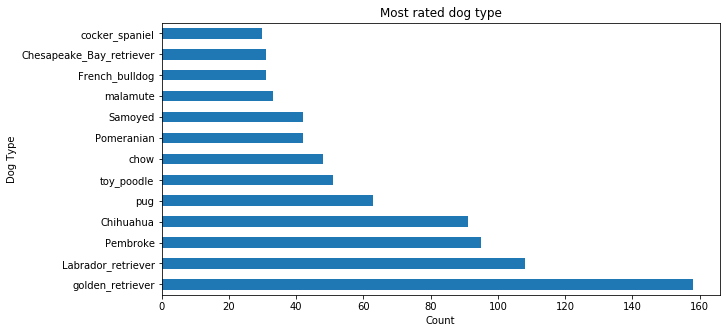

In [392]:
df_dog_type['dog_type'].value_counts().plot(kind='barh',figsize=(10,5))
plt.title('Most rated dog type')
plt.xlabel('Count')
plt.ylabel('Dog Type')

**Insight 2 and Visualization** - Tweets rate per Year

In [380]:
tweet_rate=df_merged1.groupby('year')['tweet_id'].count()
tweet_rate

year
2015    499
2016    897
2017    295
Name: tweet_id, dtype: int64

Text(0, 0.5, 'Tweets')

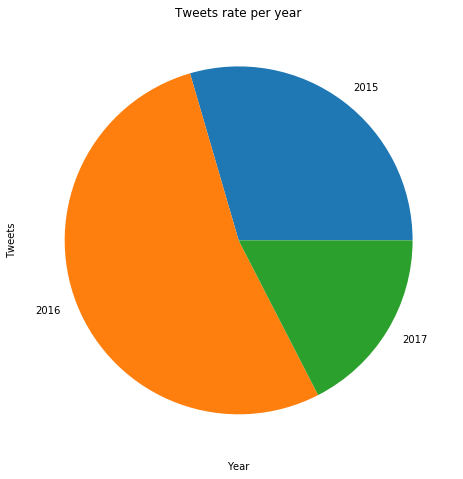

In [381]:
tweet_rate=df_merged1.groupby('year')['tweet_id'].count().plot(kind='pie',figsize=(10,8))
plt.title('Tweets rate per year')
plt.xlabel('Year')
plt.ylabel('Tweets')

**Insight 3 and visualization**
  Retweet counts and Favorite counts are correlated

In [382]:
df_merged1.head(50)

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,jpg_url,dog_type,confidence_list,retweet_count,favorite_count
0,892421000000000000,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,2017,8,1,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,8853.0,39467.0
1,892177000000000000,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,2017,8,1,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,6514.0,33819.0
2,891815000000000000,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,2017,7,31,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,4328.0,25461.0
3,891690000000000000,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,2017,7,30,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,8964.0,42908.0
4,891328000000000000,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,2017,7,29,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,9774.0,41048.0
5,891088000000000000,Here we have a majestic great white breaching ...,13.0,10.0,NaN,,2017,7,29,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137,3261.0,20562.0
7,890729000000000000,When you watch your owner call another dog a g...,13.0,10.0,NaN,,2017,7,28,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,0.692517,16716.0,56848.0
8,890609000000000000,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,,2017,7,27,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever,0.00795896,4429.0,28226.0
9,890240000000000000,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,2017,7,26,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,0.201493,7711.0,32467.0
10,890007000000000000,This is Koda. He is a South Australian decksha...,13.0,10.0,Koda,,2017,7,26,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,golden_retriever,0.77593,7624.0,31166.0


Text(0.5, 1.0, 'Retweet count VS Favorite count')

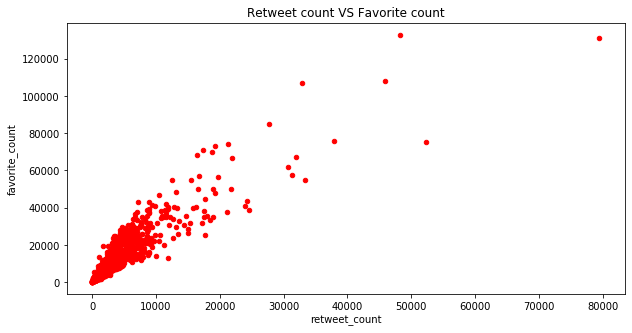

In [383]:
df_merged1.plot(x='retweet_count',y='favorite_count',figsize=(10,5),kind='scatter',color=['red'])
plt.title('Retweet count VS Favorite count')

**Insight 4 and visualization** - Displaying the most common dog names

In [398]:
df_merged1['name'].value_counts()[0:20]

Lucy       11
Cooper      9
Tucker      8
Penny       8
Charlie     7
Lola        7
Oliver      7
Toby        6
Oscar       6
Bo          6
Bailey      6
Daisy       6
Sadie       5
Milo        5
Chester     5
Winston     5
Zoey        5
Bentley     5
Koda        5
Jax         5
Name: name, dtype: int64

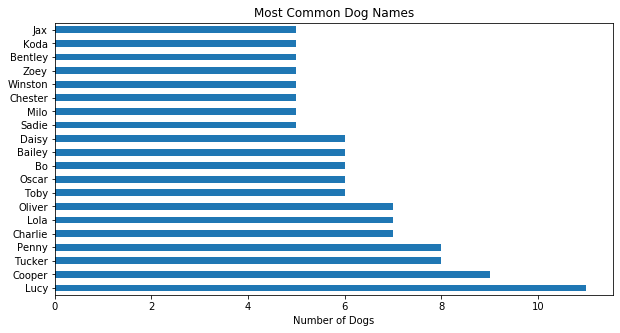

In [400]:
df_merged1.name.value_counts()[0:20].plot('barh', figsize=(10,5), title='Most Common Dog Names').set_xlabel("Number of Dogs");

**Visualization 5** - Most Dog type getting favorites

In [386]:
counts=df_merged1.groupby('dog_type')['favorite_count'].count()
counts

dog_type
Afghan_hound                        3
Airedale                           10
American_Staffordshire_terrier     14
Appenzeller                         2
Australian_terrier                  2
Bedlington_terrier                  6
Bernese_mountain_dog               11
Blenheim_spaniel                    9
Border_collie                      12
Border_terrier                      7
Boston_bull                        12
Bouvier_des_Flandres                1
Brabancon_griffon                   2
Brittany_spaniel                    8
Cardigan                           20
Chesapeake_Bay_retriever           29
Chihuahua                          82
Dandie_Dinmont                      7
Doberman                            8
English_setter                      8
English_springer                    9
EntleBucher                         0
Eskimo_dog                         18
French_bulldog                     30
German_shepherd                    20
German_short-haired_pointer         6
Gor

In [387]:
total=df_merged1.groupby('dog_type')['favorite_count'].count().sum()
total

1563

Text(0, 0.5, 'Proportinal Counts')

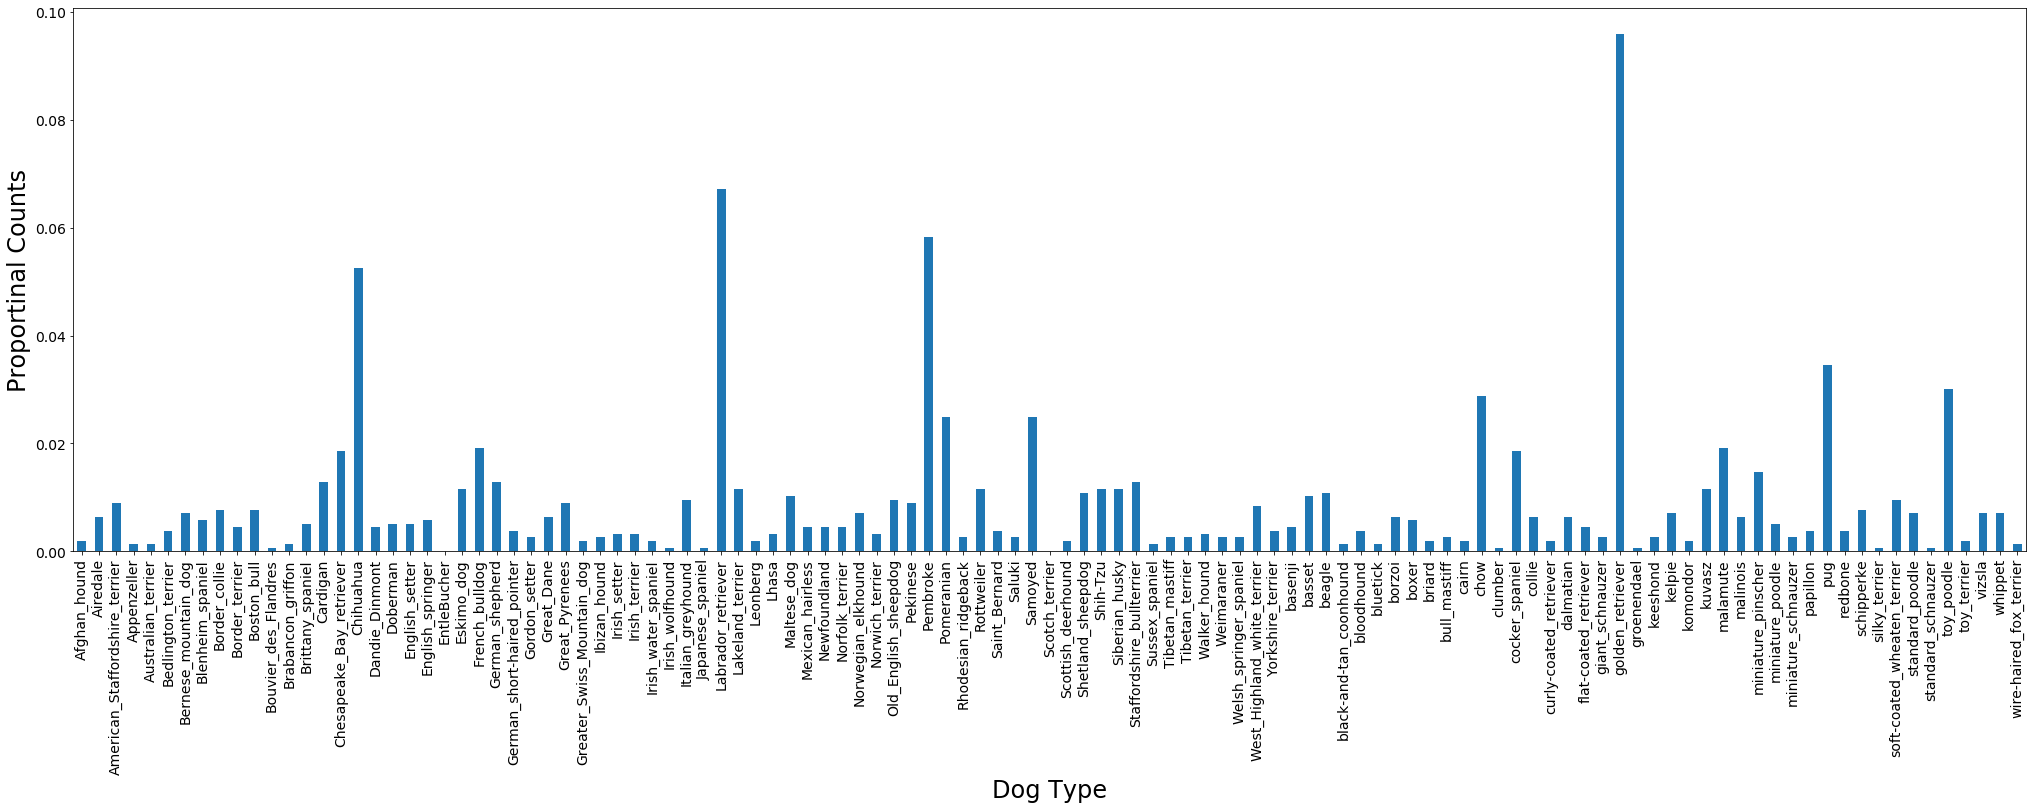

In [388]:
proportional=counts/total
proportional.plot(kind='bar',figsize=(35,10),fontsize=14)
plt.xlabel('Dog Type',fontsize=24)
plt.ylabel('Proportinal Counts',fontsize=24)